<a href="https://colab.research.google.com/github/apskis/data_science_ai_colab_books/blob/main/Lasso_Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lasso and Ridge Regression

## Learning Objectives
- Understand the motivation for **regularization** in regression.
- Learn the difference between **Ridge (L2 penalty)** and **Lasso (L1 penalty)**.
- Implement both methods in Python using scikit-learn.
- Compare performance and coefficients.

---

## 1. Why Regularization?
- Linear regression can overfit when there are many features or multicollinearity.
- **Regularization** adds a penalty to large coefficients, improving generalization.

### Ridge Regression (L2 penalty)
- Penalizes the **sum of squared coefficients**.
- Shrinks coefficients but keeps all features in the model.

### Lasso Regression (L1 penalty)
- Penalizes the **sum of absolute coefficients**.
- Can shrink some coefficients to **exactly zero**, performing feature selection.

---

## 2. Evaluation Metrics
We will use:
- **R²**: proportion of variance explained.
- **MAE**: mean absolute error.
- **RMSE**: root mean squared error.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(42)

# 1. Create high-dimensional dataset (p > n)
n_samples = 40
n_features = 50

X = np.random.randn(n_samples, n_features)

# True coefficients: only first 5 matter
true_coefs = np.zeros(n_features)
true_coefs[:5] = [3, -2, 1.5, 2, 4]

y = X @ true_coefs + np.random.randn(n_samples) * 2

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
# get training predictions
y_pred_train = lr.predict(X_train)
# get testing predictions
y_pred_test = lr.predict(X_test)

print(f'Training R2: {r2_score(y_train, y_pred_train):.2f}')
print(f'Testing R2: {r2_score(y_test, y_pred_test):.2f}')

print(f'Training MAE: {mean_absolute_error(y_train, y_pred_train):.2f}')
print(f'Testing MAE: {mean_absolute_error(y_test, y_pred_test):.2f}')

print(f'Training RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}')
print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}')

print(f'\nNumber of features used: {np.sum(lr.coef_ != 0)}')

Training R2: 1.00
Testing R2: 0.31
Training MAE: 0.00
Testing MAE: 2.75
Training RMSE: 0.00
Testing RMSE: 3.42

Number of features used: 50


In [ ]:
# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)

# predictions for train/test
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

print(f'Training R2: {r2_score(y_train, y_pred_train_lasso):.2f}')
print(f'Testing R2: {r2_score(y_test, y_pred_test_lasso):.2f}')

print(f'Training MAE: {mean_absolute_error(y_train, y_pred_train_lasso):.2f}')
print(f'Testing MAE: {mean_absolute_error(y_test, y_pred_test_lasso):.2f}')

print(f'Training RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)):.2f}')
print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)):.2f}')

print(f'\nNumber of features used: {np.sum(lasso.coef_ != 0)}')

Training R2: 0.84
Testing R2: 0.78
Training MAE: 2.06
Testing MAE: 1.49
Training RMSE: 2.73
Testing RMSE: 1.93

Number of features used: 7


In [ ]:
# ridge regression

ridge = Ridge()
ridge.fit(X_train, y_train)

# calculate predictions on training and testing
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

print(f'Training R2: {r2_score(y_train, y_pred_train_ridge):.2f}')
print(f'Testing R2: {r2_score(y_test, y_pred_test_ridge):.2f}')

print(f'Training MAE: {mean_absolute_error(y_train, y_pred_train_lasso):.2f}')
print(f'Testing MAE: {mean_absolute_error(y_test, y_pred_test_ridge):.2f}')

print(f'Training RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)):.2f}')
print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)):.2f}')

print(f'\nNumber of features used: {np.sum(ridge.coef_ != 0)}')

Training R2: 1.00
Testing R2: 0.40
Training MAE: 2.06
Testing MAE: 2.56
Training RMSE: 0.19
Testing RMSE: 3.18

Number of features used: 50


In [ ]:
result_list = []

for i in range(0, 11):
  lasso = Lasso(alpha=i)
  lasso.fit(X_train, y_train)
  # get predictions
  y_pred_test_lasso = lasso.predict(X_test)
  y_pred_train_lasso = lasso.predict(X_train)
  # calculate r2
  r2_test = r2_score(y_test, y_pred_test_lasso)
  r2_train = r2_score(y_train, y_pred_train_lasso)
  # num of features used
  num_features = np.sum(lasso.coef_ != 0)
  # append to list
  result_list.append([i, r2_train, r2_test, num_features])

result_df = pd.DataFrame(result_list, columns=['alpha', 'r2_train', 'r2_test', 'num_features'])
result_df

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


,alpha,r2_train,r2_test,num_features
0,0,1.000000,-0.360154,50
1,1,0.835501,0.778470,7
2,2,0.578030,0.523921,5
3,3,0.258959,0.169120,2
4,4,0.023634,0.017197,1
5,5,0.000000,-0.002601,0
6,6,0.000000,-0.002601,0
7,7,0.000000,-0.002601,0
8,8,0.000000,-0.002601,0
9,9,0.000000,-0.002601,0


In [ ]:
# look when alpha = 5 and num features is 0
lasso = Lasso(alpha=5)
lasso.fit(X_train, y_train)
training_preds = lasso.predict(X_train)
testing_preds = lasso.predict(X_test)
np.sum(lasso.coef_ != 0)

np.int64(0)

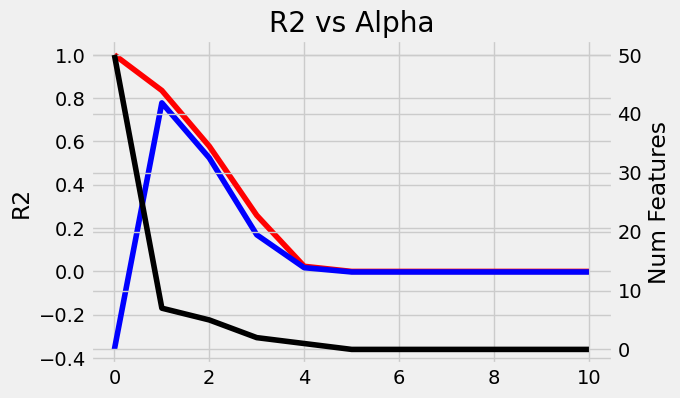

In [ ]:
with plt.style.context('fivethirtyeight'):
  fig, ax1 = plt.subplots(figsize=(6, 4))
  ax2 = ax1.twinx()
  ax1.plot(result_df['alpha'], result_df['r2_train'], label='Training R2', color='red')
  ax1.plot(result_df['alpha'], result_df['r2_test'], label='Testing R2', color='blue')
  ax2.plot(result_df['alpha'], result_df['num_features'], label='Num Features', color='black')
  #ax1.set_legend()
  plt.xlabel('Alpha')
  ax1.set_ylabel('R2')
  ax2.set_ylabel('Num Features')
  plt.title('R2 vs Alpha')
  plt.show()

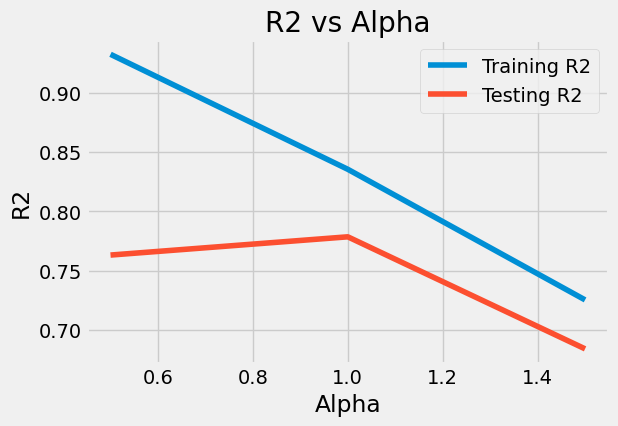

In [ ]:
result_list = []

for i in [.5, 1, 1.5]:
  lasso = Lasso(alpha=i)
  lasso.fit(X_train, y_train)
  # get predictions
  y_pred_test_lasso = lasso.predict(X_test)
  y_pred_train_lasso = lasso.predict(X_train)
  # calculate r2
  r2_test = r2_score(y_test, y_pred_test_lasso)
  r2_train = r2_score(y_train, y_pred_train_lasso)
  # num of features used
  num_features = np.sum(lasso.coef_ != 0)
  # append to list
  result_list.append([i, r2_train, r2_test, num_features])

result_df = pd.DataFrame(result_list, columns=['alpha', 'r2_train', 'r2_test', 'num_features'])

with plt.style.context('fivethirtyeight'):
  plt.figure(figsize=(6, 4))
  plt.plot(result_df['alpha'], result_df['r2_train'], label='Training R2')
  plt.plot(result_df['alpha'], result_df['r2_test'], label='Testing R2')
  plt.legend()
  plt.xlabel('Alpha')
  plt.ylabel('R2')
  plt.title('R2 vs Alpha')
  plt.show()

## 5. Key Takeaways
- **Ridge Regression**: Shrinks coefficients but keeps all features.
- **Lasso Regression**: Shrinks some coefficients to zero, performing feature selection.
- Both methods help prevent overfitting and improve generalization.
- Choice depends on whether feature selection (Lasso) or coefficient shrinkage (Ridge) is more important.
